In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from tensorflow import keras
import helper
from tfomics import utils, explain, metrics
from tensorflow.keras import backend as K

In [2]:
# load dataset
data_path = '../../data/synthetic_dataset.h5'
data = helper.load_data(data_path)
x_train, y_train, x_valid, y_valid, x_test, y_test = data

In [3]:
# Define the Gradient Function
def get_gradient_func(model):
    grads = K.gradients(model.total_loss, model.layers[1].kernel)
    inputs = model._feed_inputs + model._feed_targets
    func = K.function(inputs, grads)
    return func

# Define the Required Callback Function
class GradientCalcCallback(keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs=None):
        get_gradient = get_gradient_func(model)
        grads = get_gradient([x_train, y_train])
        epoch_gradient.append(grads)
      

In [43]:
keras.backend.clear_session()

model_name = 'cnn-deep'
activation = 'exponential'

# load model
model = helper.load_model(model_name, 
                          activation=activation, 
                          input_shape=200)

# set up optimizer and metrics
auroc = keras.metrics.AUC(curve='ROC', name='auroc')
aupr = keras.metrics.AUC(curve='PR', name='aupr')
optimizer = keras.optimizers.Adam(learning_rate=0.001)
loss = keras.losses.BinaryCrossentropy(from_logits=False, label_smoothing=0)
model.compile(optimizer=optimizer,
              loss=loss,
              metrics=['accuracy', auroc, aupr])

es_callback = keras.callbacks.EarlyStopping(monitor='val_auroc', #'val_aupr',#
                                            patience=20, 
                                            verbose=1, 
                                            mode='max', 
                                            restore_best_weights=False)
reduce_lr = keras.callbacks.ReduceLROnPlateau(monitor='val_auroc', 
                                              factor=0.2,
                                              patience=5, 
                                              min_lr=1e-7,
                                              mode='max',
                                              verbose=1) 
# Define the Gradient Fucntion
epoch_gradient = []

relu_history = model.fit(x_train, y_train, 
                         epochs=100,
                         batch_size=100, 
                         shuffle=True,
                         validation_data=(x_valid, y_valid), 
                         callbacks=[es_callback, reduce_lr, GradientCalcCallback()])


Train on 21000 samples, validate on 3000 samples
Epoch 1/100
21000/21000 [==============================] - 10s 473us/sample - loss: 0.4829 - accuracy: 0.8323 - auroc: 0.5175 - aupr: 0.1528 - val_loss: 0.4296 - val_accuracy: 0.8557 - val_auroc: 0.5061 - val_aupr: 0.1505
Epoch 2/100
21000/21000 [==============================] - 9s 425us/sample - loss: 0.4356 - accuracy: 0.8506 - auroc: 0.5543 - aupr: 0.1735 - val_loss: 0.4114 - val_accuracy: 0.8557 - val_auroc: 0.5741 - val_aupr: 0.1994
Epoch 3/100
21000/21000 [==============================] - 11s 501us/sample - loss: 0.4101 - accuracy: 0.8542 - auroc: 0.6147 - aupr: 0.2283 - val_loss: 0.3876 - val_accuracy: 0.8633 - val_auroc: 0.6485 - val_aupr: 0.2910
Epoch 4/100
21000/21000 [==============================] - 11s 542us/sample - loss: 0.3851 - accuracy: 0.8601 - auroc: 0.6767 - aupr: 0.3149 - val_loss: 0.4106 - val_accuracy: 0.8570 - val_auroc: 0.6367 - val_aupr: 0.2560
Epoch 5/100
21000/21000 [==============================] - 12s 5

Epoch 37/100
21000/21000 [==============================] - 37s 2ms/sample - loss: 0.1289 - accuracy: 0.9522 - auroc: 0.9752 - aupr: 0.9059 - val_loss: 0.1387 - val_accuracy: 0.9500 - val_auroc: 0.9737 - val_aupr: 0.9118
Epoch 38/100
21000/21000 [==============================] - 49s 2ms/sample - loss: 0.1289 - accuracy: 0.9522 - auroc: 0.9752 - aupr: 0.9065 - val_loss: 0.1384 - val_accuracy: 0.9503 - val_auroc: 0.9736 - val_aupr: 0.9114
Epoch 39/100
21000/21000 [==============================] - 40s 2ms/sample - loss: 0.1274 - accuracy: 0.9529 - auroc: 0.9759 - aupr: 0.9081 - val_loss: 0.1384 - val_accuracy: 0.9503 - val_auroc: 0.9735 - val_aupr: 0.9119
Epoch 40/100
21000/21000 [==============================] - 40s 2ms/sample - loss: 0.1269 - accuracy: 0.9530 - auroc: 0.9759 - aupr: 0.9090 - val_loss: 0.1382 - val_accuracy: 0.9501 - val_auroc: 0.9728 - val_aupr: 0.9115
Epoch 41/100
21000/21000 [==============================] - 41s 2ms/sample - loss: 0.1265 - accuracy: 0.9529 - auroc

In [44]:
relu_grad = []
for i in range(len(epoch_gradient)):
    relu_grad.append(np.reshape(epoch_gradient[i][0], (-1,)))

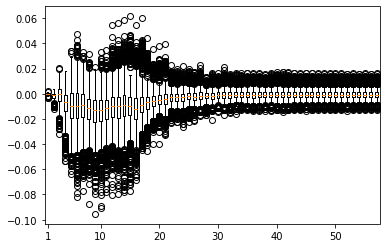

In [45]:
plt.boxplot(relu_grad);
plt.xticks([1, 10, 20, 30, 40, 50],[1, 10, 20, 30, 40, 50]);

[<matplotlib.lines.Line2D at 0x7fc42991c748>]

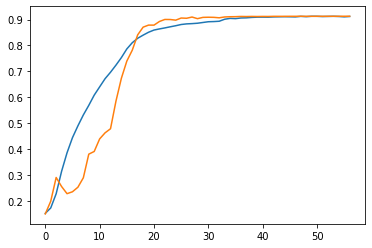

In [46]:
plt.figure()
plt.plot(relu_history.history['aupr'])
plt.plot(relu_history.history['val_aupr'])

In [ ]:
plt.figure()
plt.plot(relu_history.history['loss'])
plt.plot(relu_history.history['val_loss'])

In [ ]:
keras.backend.clear_session()

model_name = 'cnn-deep'
activation = 'exponential'

# load model
model = helper.load_model(model_name, 
                                activation=activation, 
                                input_shape=200)

# set up optimizer and metrics
auroc = keras.metrics.AUC(curve='ROC', name='auroc')
aupr = keras.metrics.AUC(curve='PR', name='aupr')
optimizer = keras.optimizers.Adam(learning_rate=0.001)
loss = keras.losses.BinaryCrossentropy(from_logits=False, label_smoothing=0)
model.compile(optimizer=optimizer,
              loss=loss,
              metrics=['accuracy', auroc, aupr])

es_callback = keras.callbacks.EarlyStopping(monitor='val_auroc', #'val_aupr',#
                                            patience=20, 
                                            verbose=1, 
                                            mode='max', 
                                            restore_best_weights=False)
reduce_lr = keras.callbacks.ReduceLROnPlateau(monitor='val_auroc', 
                                              factor=0.2,
                                              patience=5, 
                                              min_lr=1e-7,
                                              mode='max',
                                              verbose=1) 
# Define the Gradient Fucntion
epoch_gradient = []

exp_history = model.fit(x_train, y_train, 
                         epochs=100,
                         batch_size=100, 
                         shuffle=True,
                         validation_data=(x_valid, y_valid), 
                         callbacks=[es_callback, reduce_lr, GradientCalcCallback()])


Train on 21000 samples, validate on 3000 samples
Epoch 1/100
21000/21000 [==============================] - 9s 433us/sample - loss: 0.4820 - accuracy: 0.8327 - auroc: 0.5172 - aupr: 0.1525 - val_loss: 0.4224 - val_accuracy: 0.8557 - val_auroc: 0.5085 - val_aupr: 0.1478
Epoch 2/100
21000/21000 [==============================] - 9s 422us/sample - loss: 0.4354 - accuracy: 0.8508 - auroc: 0.5521 - aupr: 0.1724 - val_loss: 0.4223 - val_accuracy: 0.8557 - val_auroc: 0.5373 - val_aupr: 0.1678
Epoch 3/100
21000/21000 [==============================] - 10s 459us/sample - loss: 0.3956 - accuracy: 0.8620 - auroc: 0.6343 - aupr: 0.2907 - val_loss: 0.3529 - val_accuracy: 0.8771 - val_auroc: 0.6912 - val_aupr: 0.3842
Epoch 4/100
21000/21000 [==============================] - 10s 489us/sample - loss: 0.3605 - accuracy: 0.8741 - auroc: 0.6971 - aupr: 0.3933 - val_loss: 0.3576 - val_accuracy: 0.8759 - val_auroc: 0.6842 - val_aupr: 0.3810
Epoch 5/100
21000/21000 [==============================] - 11s 52

Epoch 38/100
21000/21000 [==============================] - 56s 3ms/sample - loss: 0.1441 - accuracy: 0.9499 - auroc: 0.9644 - aupr: 0.8911 - val_loss: 0.1476 - val_accuracy: 0.9457 - val_auroc: 0.9694 - val_aupr: 0.9068
Epoch 39/100
21000/21000 [==============================] - 60s 3ms/sample - loss: 0.1422 - accuracy: 0.9505 - auroc: 0.9652 - aupr: 0.8936 - val_loss: 0.1452 - val_accuracy: 0.9456 - val_auroc: 0.9717 - val_aupr: 0.9088
Epoch 40/100
21000/21000 [==============================] - 59s 3ms/sample - loss: 0.1408 - accuracy: 0.9509 - auroc: 0.9660 - aupr: 0.8962 - val_loss: 0.1482 - val_accuracy: 0.9449 - val_auroc: 0.9697 - val_aupr: 0.9053
Epoch 41/100
21000/21000 [==============================] - 44s 2ms/sample - loss: 0.1389 - accuracy: 0.9522 - auroc: 0.9665 - aupr: 0.8983 - val_loss: 0.1488 - val_accuracy: 0.9439 - val_auroc: 0.9691 - val_aupr: 0.9049
Epoch 42/100
21000/21000 [==============================] - 44s 2ms/sample - loss: 0.1392 - accuracy: 0.9519 - auroc

In [ ]:
exp_grad = []
for i in range(len(epoch_gradient)):
    exp_grad.append(np.reshape(epoch_gradient[i][0], (-1,)))

In [ ]:
plt.boxplot(exp_grad);
plt.xticks([1, 10, 20, 30, 40, 50],[1, 10, 20, 30, 40, 50]);

In [ ]:
plt.figure()
plt.plot(exp_history.history['aupr'])
plt.plot(exp_history.history['val_aupr'])

In [ ]:
plt.figure()
plt.plot(exp_history.history['loss'])
plt.plot(exp_history.history['val_loss'])

In [18]:
grad = []
for i in range(len(epoch_gradient)):
    grad.append(np.reshape(epoch_gradient[i][0], (-1,)))

([<matplotlib.axis.XTick at 0x7fc5788b4e48>,
 [Text(0, 0, '1'),
  Text(0, 0, '10'),
  Text(0, 0, '20'),
  Text(0, 0, '30'),
  Text(0, 0, '40'),
  Text(0, 0, '50')])

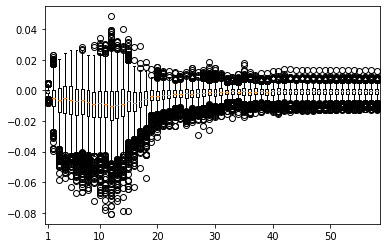

In [25]:
plt.boxplot(grad);
plt.xticks([1, 10, 20, 30, 40, 50],[1, 10, 20, 30, 40, 50]);


[<matplotlib.lines.Line2D at 0x7fc577daf0f0>]

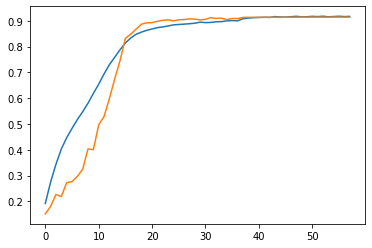

In [42]:
plt.figure()
plt.plot(history.history['aupr'])
plt.plot(history.history['val_aupr'])